### IMPORTACIONES

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re #regex para validar si existe subfijos
from sklearn.preprocessing import StandardScaler
import numpy as np

### LECTURA DE ARCHIVOS

In [2]:


# Lee el archivo CSV
df = pd.read_csv('limpio.csv')

# Muestra las primeras filas del DataFrame para verificar
print(df.head())


   Ramanshift  collagen  collagen.1  collagen.2  collagen.3  collagen.4  \
0     1801.26     0.117       0.123       0.098       0.097       0.115   
1     1797.41     0.118       0.124       0.099       0.098       0.116   
2     1793.55     0.119       0.124       0.100       0.098       0.117   
3     1789.69     0.118       0.122       0.099       0.097       0.117   
4     1785.84     0.118       0.121       0.099       0.096       0.116   

   collagen.5  collagen.6  collagen.7  collagen.8  ...  DNA.100  DNA.101  \
0       0.129       0.130       0.144       0.129  ...    0.154    0.150   
1       0.130       0.131       0.145       0.129  ...    0.154    0.152   
2       0.131       0.132       0.145       0.130  ...    0.155    0.153   
3       0.131       0.132       0.146       0.131  ...    0.155    0.154   
4       0.130       0.131       0.146       0.131  ...    0.155    0.155   

   DNA.102  DNA.103  DNA.104  DNA.105  DNA.106  DNA.107  DNA.108  DNA.109  
0    0.154    0.

 ### Verificamos si se tiene los subfijos al leer el archivo

In [3]:
if any(re.search(r'\.\d+$', col) for col in df.columns):
    # Si hay columnas con sufijos, eliminarlos
    df.columns = [re.sub(r'\.\d+$', '', col) for col in df.columns]
    print("Se eliminaron los sufijos numéricos de los encabezados.")
# Muestra las primeras filas del DataFrame para verificar
print(df.head())

Se eliminaron los sufijos numéricos de los encabezados.
   Ramanshift  collagen  collagen  collagen  collagen  collagen  collagen  \
0     1801.26     0.117     0.123     0.098     0.097     0.115     0.129   
1     1797.41     0.118     0.124     0.099     0.098     0.116     0.130   
2     1793.55     0.119     0.124     0.100     0.098     0.117     0.131   
3     1789.69     0.118     0.122     0.099     0.097     0.117     0.131   
4     1785.84     0.118     0.121     0.099     0.096     0.116     0.130   

   collagen  collagen  collagen  ...    DNA    DNA    DNA    DNA    DNA  \
0     0.130     0.144     0.129  ...  0.154  0.150  0.154  0.164  0.157   
1     0.131     0.145     0.129  ...  0.154  0.152  0.155  0.164  0.158   
2     0.132     0.145     0.130  ...  0.155  0.153  0.156  0.165  0.160   
3     0.132     0.146     0.131  ...  0.155  0.154  0.157  0.165  0.160   
4     0.131     0.146     0.131  ...  0.155  0.155  0.157  0.166  0.160   

     DNA    DNA    DNA    DNA 

In [4]:
unique_headers = df.columns.unique()
print("\nEncabezados únicos:")
print(unique_headers)

# Identificar los tipos únicos de valores en los encabezados
unique_types = set(col for col in df.columns if col != "Ramanshift")


Encabezados únicos:
Index(['Ramanshift', 'collagen', 'glycogen', 'lipids', 'DNA'], dtype='object')


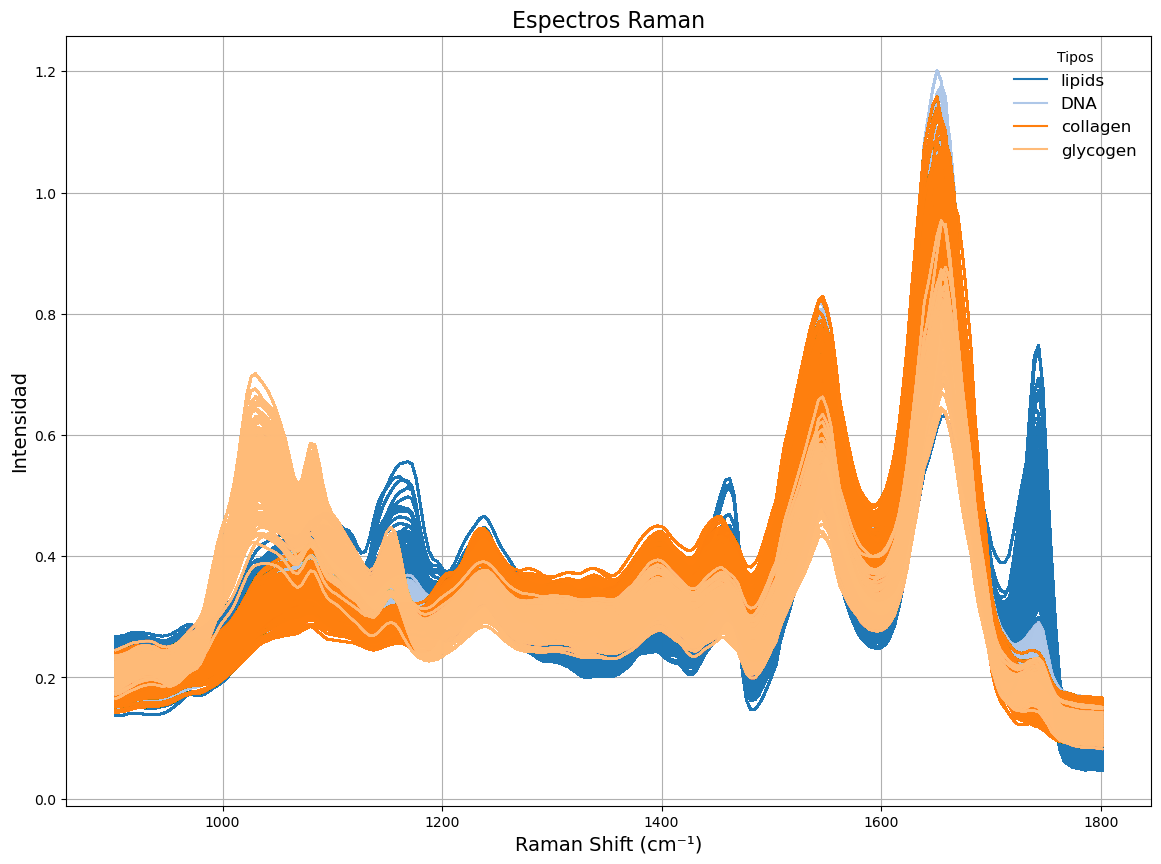

In [5]:
# Colores para cada tipo
colors = plt.cm.tab20.colors  # Una paleta de colores suficientemente grande
color_map = {unique: colors[i % len(colors)] for i, unique in enumerate(unique_types)}

# Graficar cada tipo una sola vez en la leyenda
plt.figure(figsize=(14, 10))

for unique_type in unique_types:
    # Filtrar las columnas correspondientes al tipo actual
    columns = [col for col in df.columns if col.startswith(unique_type)]
    
    # Graficar todas las columnas del tipo actual
    for col in columns:
        plt.plot(df['Ramanshift'], df[col], color=color_map[unique_type], alpha=0.6)
    
    # Agregar una entrada en la leyenda solo para el tipo (una vez)
    plt.plot([], [], label=unique_type, color=color_map[unique_type])  # Dummy plot for legend

# Etiquetas y leyendas
plt.title("Espectros Raman", fontsize=16)
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
plt.ylabel("Intensidad", fontsize=14)
plt.legend(title="Tipos", fontsize=12, loc='upper right', frameon=False)
plt.grid(True)

# Mostrar la gráfica
plt.show()

### En este caso pediremos al usuario ingresar algun tipo para graficar, para tener una idea de como se ve los espectros para cada uno de los tipos existentes en el archivo.

<div class="alert alert-block alert-info">
<b>PD:</b> Aqui solo se mostraran hasta 10 como cantidad maxima de columnas para tipo, es para una referencia y no tener una carga de datos excesiva 
</div>

Ingrese el tipo de espectro para graficar (opciones: lipids, DNA, collagen, glycogen): DNA


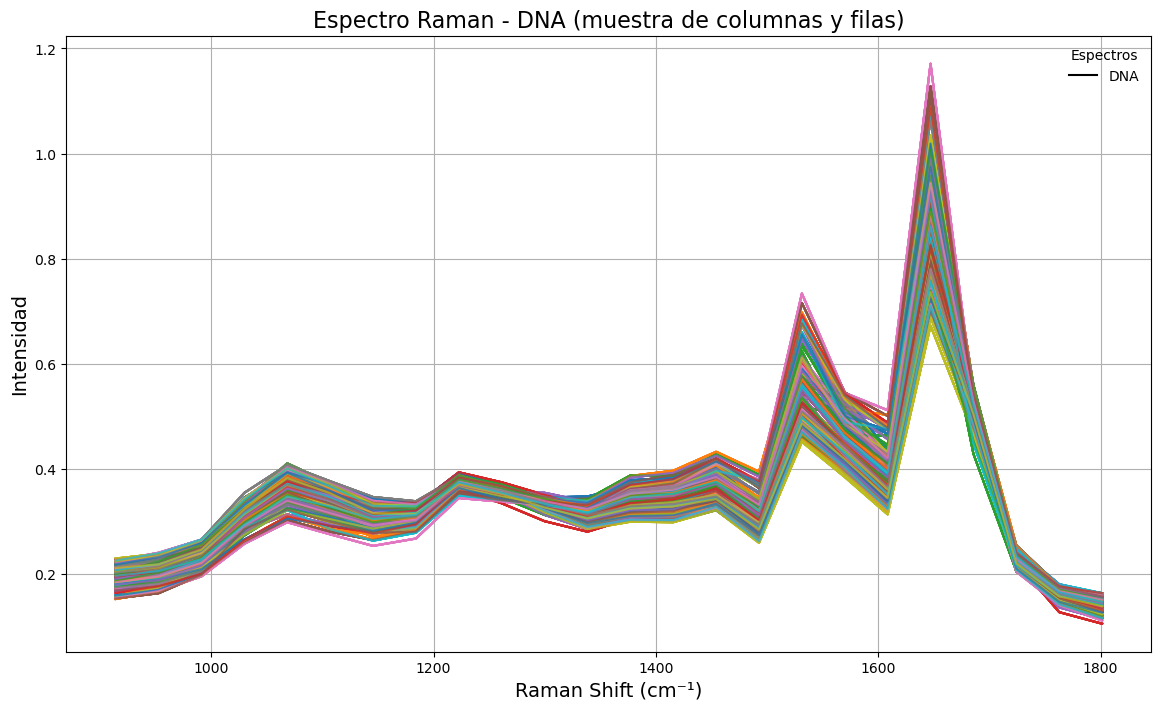

In [6]:
# Configurar el tipo de espectro que se desea graficar
tipo_espectro = input(f"Ingrese el tipo de espectro para graficar (opciones: {', '.join(unique_types)}): ").strip()

# Filtrar las columnas correspondientes al tipo de espectro ingresado
columnas_tipo = [col for col in df.columns if col.startswith(tipo_espectro)]

if columnas_tipo:
    # Limitar el número de columnas graficadas
    max_columns = 10
    columnas_tipo = columnas_tipo[:max_columns]

    # Reducir la cantidad de datos graficados
    sampled_df = df.iloc[::10, :]

    # Crear la gráfica
    plt.figure(figsize=(14, 8))

    # Graficar todas las líneas sin leyenda
    for col in columnas_tipo:
        plt.plot(sampled_df['Ramanshift'], sampled_df[col], alpha=0.7)

    # Añadir una entrada única en la leyenda para el tipo
    plt.plot([], [], label=tipo_espectro, color='black') 

    # Etiquetas y leyenda
    plt.title(f"Espectro Raman - {tipo_espectro} (muestra de columnas y filas)", fontsize=16)
    plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)
    plt.ylabel("Intensidad", fontsize=14)
    plt.legend(title="Espectros", fontsize=10, loc='upper right', frameon=False)
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()
else:
    print(f"No se encontraron columnas para el tipo de espectro '{tipo_espectro}'. Verifique el nombre e intente nuevamente.")


# Analisis PCA

### ¿Por qué utilizar PCA en espectros?
En datos espectroscópicos (como los Raman), los conjuntos de datos suelen tener alta dimensionalidad y las variables (picos) pueden estar correlacionadas. El PCA es útil porque:

**Reduce la dimensionalidad:** Permite analizar un número menor de variables representativas. <br>
**Captura patrones esenciales:** Identifica las características espectrales clave. <br>
**Mejora la visualización:** Ayuda a visualizar datos complejos en gráficos 2D o 3D.  <br>
**Preprocesamiento:** Facilita la clasificación o el análisis posterior (por ejemplo, identificación de muestras).

<img src=pca-analysis.gif>


### Cálculo del PCA
**Calcular la matriz de covarianza:** Representa cómo varían las variables juntas.<br>
**Obtener los valores y vectores propios:** Los valores propios determinan la importancia (varianza explicada) de cada componente, y los vectores propios indican la dirección de los nuevos ejes. <br>
**Proyección de los datos:** Transformar los datos originales en los nuevos ejes definidos por los componentes principales.

### Aplicación práctica en espectros
#### En espectros Raman:

**Objetivo:** Identificar patrones comunes entre muestras (como grupos químicos) o distinguir diferencias entre ellas. <br>
**Componentes principales:** Representan características espectrales clave que explican la mayoría de las variaciones entre los espectros. 

<div class="alert alert-block alert-danger">
<b>Limitaciones PCA:</b> Es una técnica lineal, lo que significa que no captura relaciones no lineales en los datos.
Los componentes principales pueden ser difíciles de interpretar físicamente.
Depende de la correcta estandarización y limpieza de los datos.
</div>



## Fundamento matemático 

### 1. Matriz de datos
Dado un conjunto de datos con 
𝑚
m muestras y 
𝑛
n variables, representamos los datos en una matriz de datos 
𝑋
X de tamaño 
𝑚
×
𝑛
m×n:
$$
X = 
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$$

Donde cada fila es una muestra, y cada columna es una variable (por ejemplo, la intensidad de un espectro en una longitud de onda específica).

### 2. Estandarización
El PCA requiere que las variables tengan media 0 y desviación estándar 1. Para ello, estandarizamos cada variable:

$$
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

#### 1. Fórmula para estandarización de los datos

$$
z_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

Donde:

- \( \mu_j \): Media de la variable \( j \).
- \( \sigma_j \): Desviación estándar de la variable \( j \).

Esto nos da una nueva matriz \( Z \), estandarizada.

---



In [10]:
# Volver a realizar la estandarización con las columnas corregidas
data_no_suffix = df.drop(columns=["Ramanshift"])  # Eliminar la columna 'Ramanshift'

# Estandarizar los datos nuevamente
scaler = StandardScaler()
data_standardized_no_suffix = scaler.fit_transform(data_no_suffix)

# Convertir la matriz estandarizada en un DataFrame para inspección
data_standardized_no_suffix_df = pd.DataFrame(data_standardized_no_suffix, columns=data_no_suffix.columns)

# Mostrar las primeras filas del DataFrame estandarizado sin sufijos
data_standardized_no_suffix_df.head()


,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
0,-1.526597,-1.479834,-1.724400,-1.714496,-1.600954,-1.477475,-1.448465,-1.373561,-1.419715,-1.276353,...,-1.229004,-1.331356,-1.333678,-1.088872,-1.255624,-1.095321,-1.263131,-1.466583,-1.586446,-1.388543
1,-1.519969,-1.473693,-1.717442,-1.707822,-1.593968,-1.471007,-1.441724,-1.367183,-1.419715,-1.270468,...,-1.229004,-1.318562,-1.327229,-1.088872,-1.249488,-1.085207,-1.257143,-1.466583,-1.578672,-1.381874
2,-1.513342,-1.473693,-1.710484,-1.707822,-1.586982,-1.464540,-1.434983,-1.367183,-1.413121,-1.270468,...,-1.223194,-1.312165,-1.320779,-1.083733,-1.237217,-1.080150,-1.251154,-1.459287,-1.570898,-1.375205
3,-1.519969,-1.485974,-1.717442,-1.714496,-1.586982,-1.464540,-1.434983,-1.360805,-1.406527,-1.264583,...,-1.223194,-1.305768,-1.314329,-1.083733,-1.237217,-1.070035,-1.245166,-1.451990,-1.563124,-1.368536
4,-1.519969,-1.492114,-1.717442,-1.721170,-1.593968,-1.471007,-1.441724,-1.360805,-1.406527,-1.270468,...,-1.223194,-1.299371,-1.314329,-1.078594,-1.237217,-1.070035,-1.245166,-1.451990,-1.555350,-1.368536


### 3. Matriz de covarianza

La matriz de covarianza mide cómo varían las variables entre sí:

$$
C = \frac{1}{m - 1} Z^\top Z
$$

Donde:

- \( C \): Es la matriz de covarianza (\( n \times n \)).
- \( Z^\top \): La transpuesta de la matriz estandarizada \( Z \).

Cada elemento de \( C \), \( c_{ij} \), mide la covarianza entre las variables \( i \) y \( j \):

$$
c_{ij} = \frac{1}{m-1} \sum_{k=1}^m (z_{ki} - \bar{z}_i)(z_{kj} - \bar{z}_j)
$$

---



In [13]:
# Calcular la matriz de covarianza a partir de los datos estandarizados
covariance_matrix = np.cov(data_standardized_no_suffix.T)

# Convertir la matriz de covarianza a un DataFrame para visualización
covariance_matrix_df = pd.DataFrame(
    covariance_matrix,
    index=data_no_suffix.columns,
    columns=data_no_suffix.columns
)

# Mostrar las primeras filas de la matriz de covarianza
covariance_matrix_df.head()


,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,collagen,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
collagen,1.004292,0.958924,0.996014,0.959541,1.002943,0.995841,1.000483,0.989208,1.002555,0.984040,...,0.948712,0.981843,0.983668,0.949566,0.977372,0.954124,0.980845,0.992702,0.988251,0.986068
collagen,0.958924,1.004292,0.975651,0.997782,0.952744,0.986154,0.936806,0.989302,0.955812,0.984501,...,0.982338,0.958963,0.965540,0.974752,0.963784,0.970548,0.967516,0.939866,0.924302,0.962567
collagen,0.996014,0.975651,1.004292,0.984530,0.996715,0.994673,0.983212,0.986300,0.989699,0.977075,...,0.947842,0.964750,0.969173,0.943213,0.961375,0.944684,0.966751,0.973879,0.969326,0.971271
collagen,0.959541,0.997782,0.984530,1.004292,0.956880,0.981138,0.935617,0.978880,0.952636,0.969905,...,0.962415,0.943845,0.951187,0.952195,0.946112,0.948096,0.951901,0.934273,0.923413,0.950391
collagen,1.002943,0.952744,0.996715,0.956880,1.004292,0.992566,0.998998,0.983339,0.999521,0.975290,...,0.936503,0.974404,0.976519,0.936848,0.968655,0.942201,0.972366,0.990635,0.988524,0.979326


<div class="alert alert-block alert-info">
<b>Matriz De Covarianza Raman</b> Se ha calculado la matriz de covarianza a partir de los datos estandarizados. Esta matriz representa cómo varían las variables (columnas del espectro) entre sí.
</div>



### 4. Descomposición en valores propios

El PCA se basa en encontrar los vectores propios (\( v \)) y los valores propios (\( \lambda \)) de la matriz de covarianza:

$$
C v = \lambda v
$$

Donde:

- \( v \): Es el vector propio (dirección del nuevo eje).
- \( \lambda \): Es el valor propio (cuánta varianza explica ese eje).

Los valores propios están ordenados de mayor a menor y representan la cantidad de varianza explicada por cada componente principal.

---

### 5 Transformación de los datos

Los datos originales se transforman proyectándolos en los ejes definidos por los vectores propios:

$$
T = Z V
$$

Donde:

- \( T \): Matriz transformada (nuevos datos en el espacio de los componentes principales).
- \( V \): Matriz cuyas columnas son los vectores propios (direcciones principales).

Cada fila de \( T \) es la representación de una muestra en el espacio reducido.

---

### 6. Varianza explicada

La proporción de varianza explicada por cada componente principal es:

$$
\text{Varianza explicada} = \frac{\lambda_i}{\sum \lambda}
$$

Esto nos dice cuánto contribuye cada componente principal a la variabilidad total de los datos.
